In [1]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import sys
from matplotlib import animation, rc
from IPython.display import HTML, Image

src_dir = os.path.abspath("/home/mmfarrugia/repos/optimization/hybrid_optimizer")
sys.path.append(src_dir)

from hybrid_optimizer.hybrid_optimizer import PSO_DE
from pyswarms.utils.plotters.formatters import Mesher, Designer
from pyswarms.utils.plotters.plotters import plot_cost_history, plot_contour, plot_surface
from hybrid_optimizer.plotters import plot_summary
from  hybrid_optimizer import example_funcs

technical_replicates = 10
size_pop = 50
max_iter = 200

In [2]:
# Universal config setup
random_config = {
    'name': 'Random',
    "n_dim": 2,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_DE": False,
    "max_iter": max_iter,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
random_fixedF_config = {
    'name': 'RandomFixedF',
    "n_dim": 2,
    "size_pop": size_pop,
    "vectorize_func": False,
    "F": (0.5, 0.5),
    "taper_DE": False,
    "max_iter": max_iter,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
best_config = {
    'name': 'Best',
    "n_dim": 2,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_DE": False,
    "max_iter": max_iter,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/best/1'
}
best_fixedF_config = {
    'name': 'BestFixedF',
    "n_dim": 2,
    "F": (0.5, 0.5),
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_DE": False,
    "max_iter": max_iter,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/best/1'
}

taper_rand_config = {
    'name': 'RandTaperFreq',
    "n_dim": 2,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_DE": True,
    "max_iter": max_iter,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}

taper_best_config = {
    'name': 'BestTaperFreq',
    "n_dim": 2,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_DE": True,
    "max_iter": max_iter,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/best/1'
}

configs = [random_config, random_fixedF_config, best_config, best_fixedF_config, taper_rand_config, taper_best_config]

In [3]:
def run_plot_opts(function, dimensions, config_list, technical_replicates, name):
    fig, ax = plt.subplots(1, len(config_list), figsize=(5.5*len(config_list),6), sharey=True)
    fig.suptitle(name)
    opts = {}
    full_opts = {}
    for i, config in enumerate(config_list):
        opt_name = config['name']
        full_opts[opt_name] = []
        opt = (PSO_DE(function, n_dim=dimensions, config=config))
        opt.record_mode = True
        opt.run()
        print('i: best_x is ', opt.gbest_x, 'best_y is', opt.gbest_y)
        opts[opt_name] = opt
        full_opts[opt_name].append(opt)
        sum_loss = np.array(opt.gbest_y_hist)
        sum_x = np.array(opt.gbest_x)
        sum_y = opt.gbest_y
        for t in range(technical_replicates-1):
            opt = (PSO_DE(function, n_dim=dimensions, config=config))
            opt.record_mode = True
            opt.run()
            full_opts[opt_name].append(opt)
            sum_loss += opt.gbest_y_hist
            sum_x += opt.gbest_x
            sum_y += opt.gbest_y
        #fig.add_subplot(1, len(configs), i+1)
        average_loss = np.divide(sum_loss, technical_replicates)
        average_x = np.divide(sum_x, technical_replicates)
        average_y = sum_y / technical_replicates
        #average_x = ["{:.5e}".format(x) for x in average_x]
        results_text =  "{:.5e}".format(average_y[0]) + ' @ X: ' + str(average_x)
        ax[i].plot(average_loss)
        #plt.xlabel('Iteration')
        ax[i].set_ylabel('Best Known F(X)')
        ax[i].annotate(results_text, (0,0), (0,-20), xycoords='axes fraction', textcoords='offset points', va='top')
        ax[i].set_title(opt_name)

    fig.tight_layout()
    plt.show()

    return opts, full_opts

Goldstein-Price's  objective function

    Only takes two dimensions and has a global minimum at
    :code:`f([0,-1])`. Its domain is bounded between :code:`[-2, 2]`

    Best visualized in the domain of :code:`[-1.3,1.3]` and range :code:`[-1,8000]`

In [4]:
import copy
n_dim = 2
lb = [-2., -2.]
ub = [2., 2.]
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

for config in configs:
    config["initial_guesses"] = common_start
    config["lb"] = lb
    config["ub"] = ub
    config["n_dim"] = n_dim
    config["vectorize_func"] = False

global_opt = (0, -1, 3)


In [5]:
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.goldstein, limits=[(-1.3,1.3), (-1.3,1.3)],  levels=[3., 3.0001, 3.001, 3.01, 3.1, 3.5, 4., 5., 7., 10., 20., 40., 80., 160., 320., 640., 1280.])
#Adjust figure limits
d = Designer(limits=[(-1.3,1.3), (-1.3,1.3), (-1,800)], label=['x-axis', 'y-axis', 'z-axis'])

i: best_x is  [ 1.5915670e-04 -1.0004856e+00] best_y is [3.00012506]
i: best_x is  [-0.00126468 -1.00076672] best_y is [3.00044807]
i: best_x is  [-6.93855032e-06 -1.00000220e+00] best_y is [3.00000001]
i: best_x is  [ 4.49655665e-11 -9.99999988e-01] best_y is [3.]
i: best_x is  [ 1.22391192e-09 -1.00000001e+00] best_y is [3.]
i: best_x is  [ 1.45539329e-08 -1.00000000e+00] best_y is [3.]


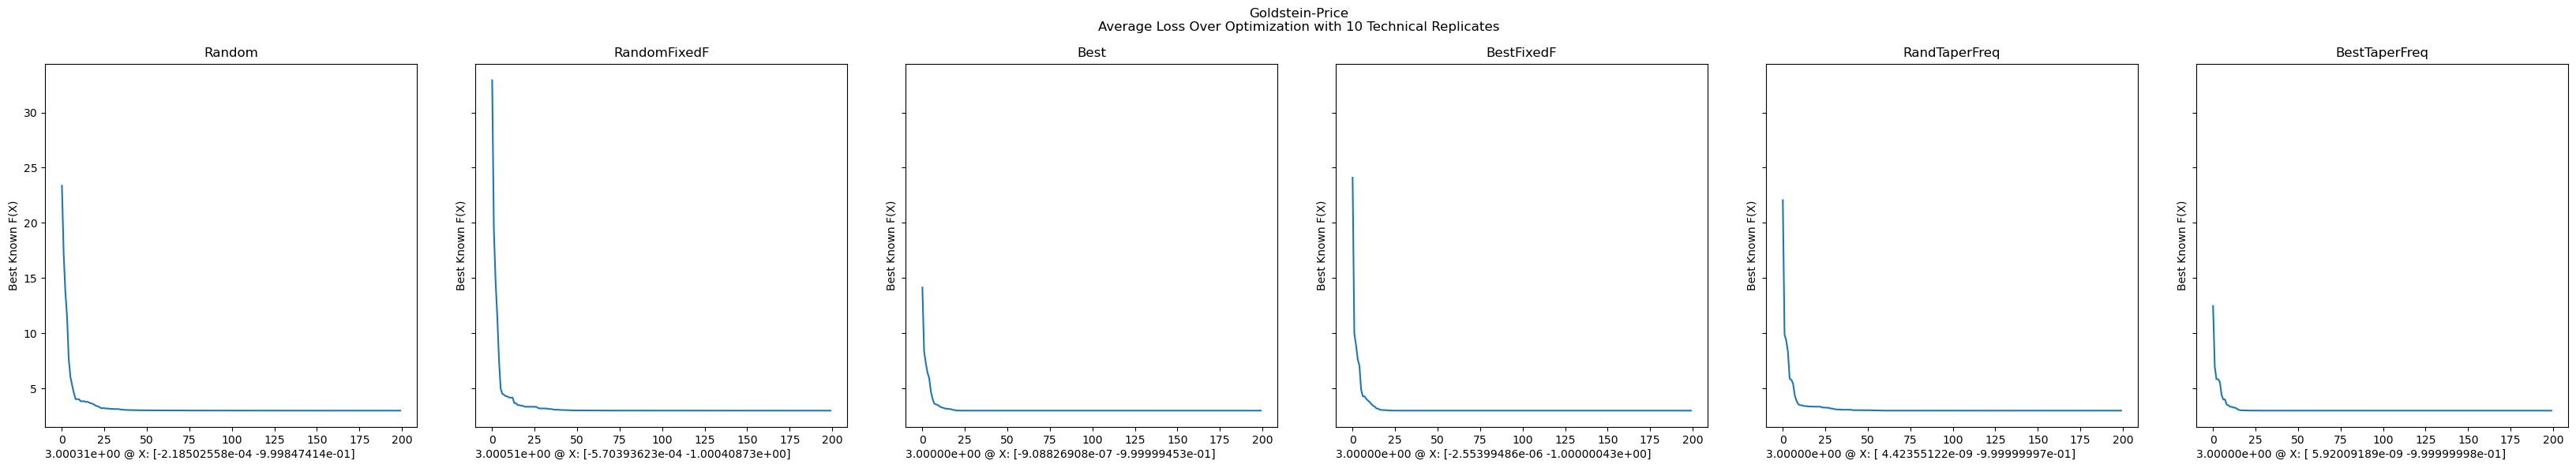

In [6]:
opts, full_opts = run_plot_opts(example_funcs.goldstein, n_dim, configs, technical_replicates, 'Goldstein-Price\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')

i: best_x is  [-2.02840562e-04 -1.00000948e+00] best_y is [3.00000999]
i: best_x is  [-6.71191767e-04 -9.99843165e-01] best_y is [3.00014678]
i: best_x is  [ 4.09520582e-07 -9.99999607e-01] best_y is [3.]
i: best_x is  [ 5.50336470e-06 -9.99997758e-01] best_y is [3.00000001]
i: best_x is  [-5.20952412e-09 -1.00000000e+00] best_y is [3.]
i: best_x is  [ 4.83809415e-09 -9.99999993e-01] best_y is [3.]


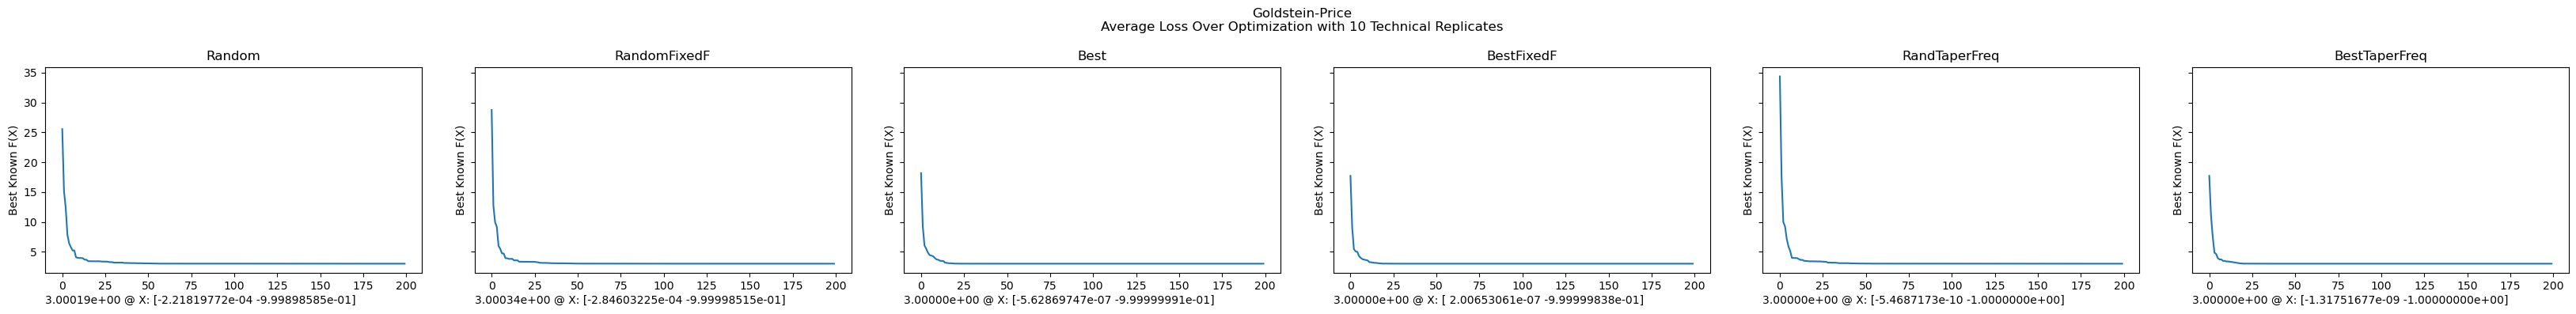

In [7]:
fig, ax = plt.subplots(1, len(configs), figsize=(5.5*len(configs),4), sharey=True)
fig.suptitle('Goldstein-Price\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')
opts = {}
full_opts = {}
for i, config in enumerate(configs):
    opt_name = config['name']
    full_opts[opt_name] = []
    opt = (PSO_DE(example_funcs.goldstein, n_dim=2, config=config))
    opt.record_mode = True
    opt.run()
    print('i: best_x is ', opt.gbest_x, 'best_y is', opt.gbest_y)
    opts[opt_name] = opt
    full_opts[opt_name].append(opt)
    sum_loss = np.array(opt.gbest_y_hist)
    sum_x = np.array(opt.gbest_x)
    sum_y = opt.gbest_y
    for t in range(technical_replicates-1):
        opt = (PSO_DE(example_funcs.goldstein, n_dim=2, config=config))
        opt.record_mode = True
        opt.run()
        full_opts[opt_name].append(opt)
        sum_loss += opt.gbest_y_hist
        sum_x += opt.gbest_x
        sum_y += opt.gbest_y
    #fig.add_subplot(1, len(configs), i+1)
    average_loss = np.divide(sum_loss, technical_replicates)
    average_x = np.divide(sum_x, technical_replicates)
    average_y = sum_y / technical_replicates
    #average_x = ["{:.5e}".format(x) for x in average_x]
    results_text =  "{:.5e}".format(average_y[0]) + ' @ X: ' + str(average_x)
    ax[i].plot(average_loss)
    #plt.xlabel('Iteration')
    ax[i].set_ylabel('Best Known F(X)')
    ax[i].annotate(results_text, (0,0), (0,-20), xycoords='axes fraction', textcoords='offset points', va='top')
    ax[i].set_title(opt_name)
    
fig.tight_layout()
plt.show()

400
400
400
400
261
261


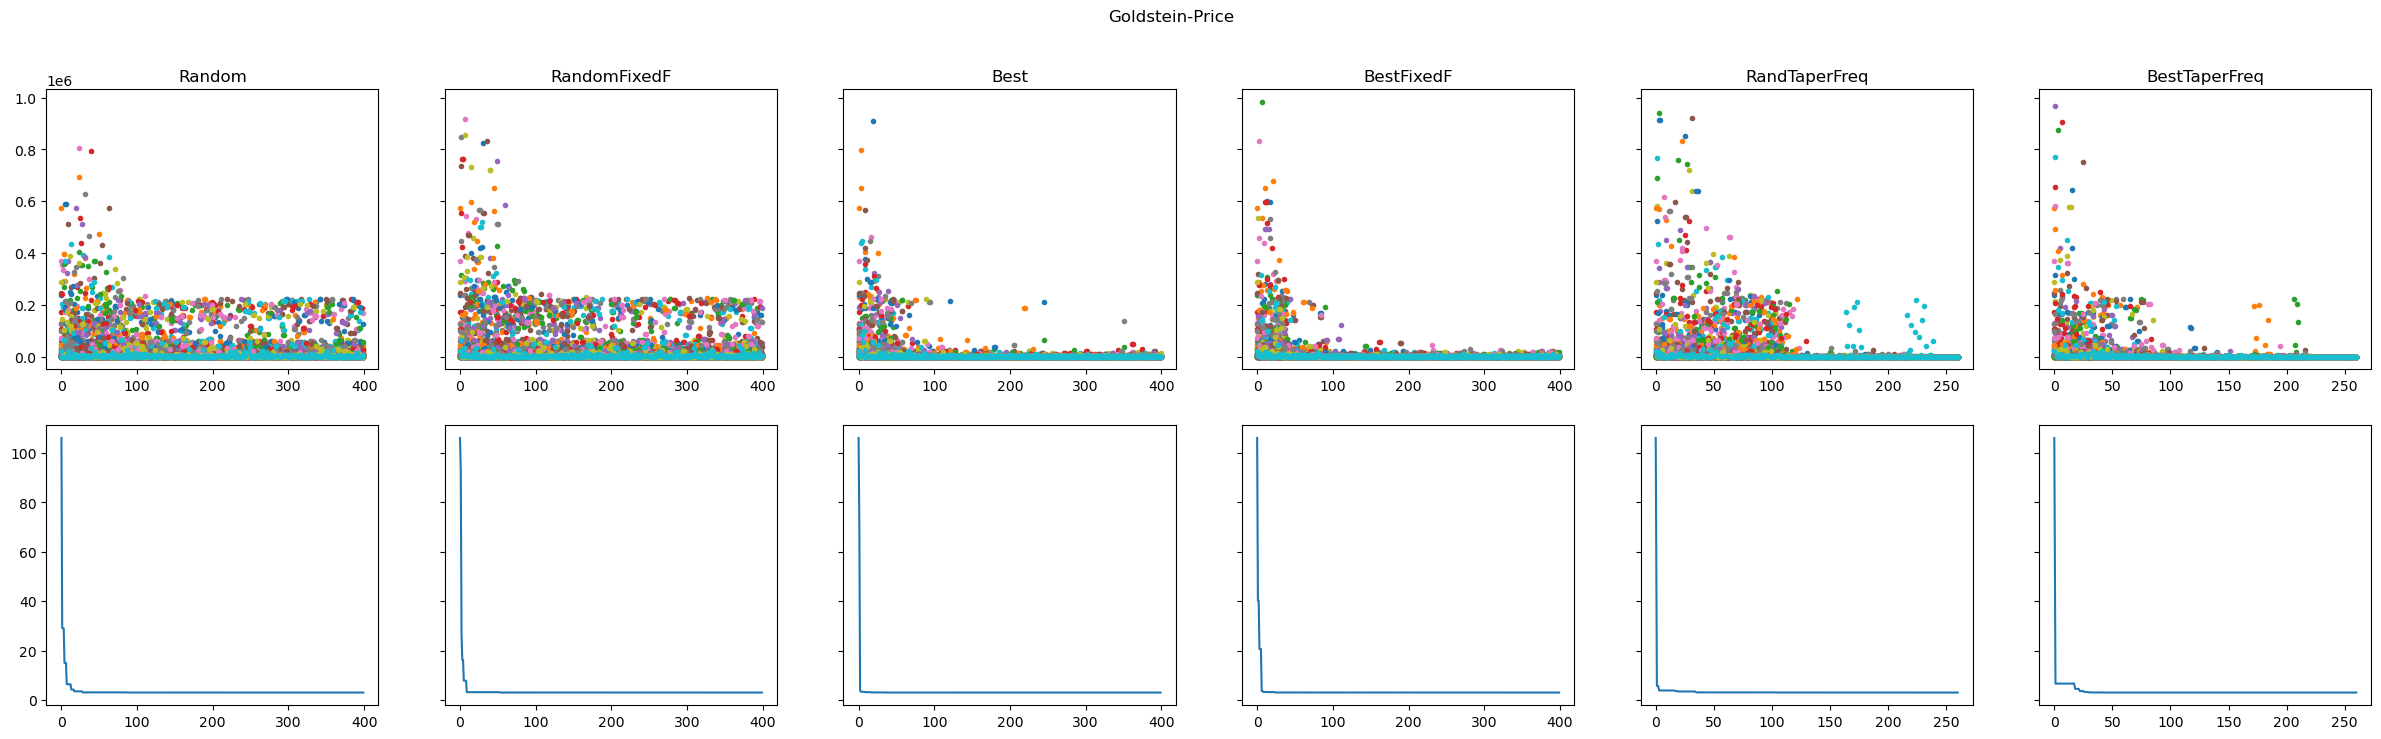

In [8]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8), sharey='row')
fig.suptitle('Goldstein-Price')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    #max_y = max(max_y, max(opt.record_value['gbest_Y']))
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [9]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('goldstein_price_'+str(i)+'.gif', writer='ffmpeg', fps=20)

2025-10-22 19:01:15,632 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:01:15,633 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -framerate 20 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y goldstein_price_Random.gif
2025-10-22 19:01:41,899 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:01:41,900 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -framerate 20 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y goldstein_price_RandomFixedF.gif
2025-10-22 19:02:03,414 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:02:03,415 - matplotlib.animation - IN

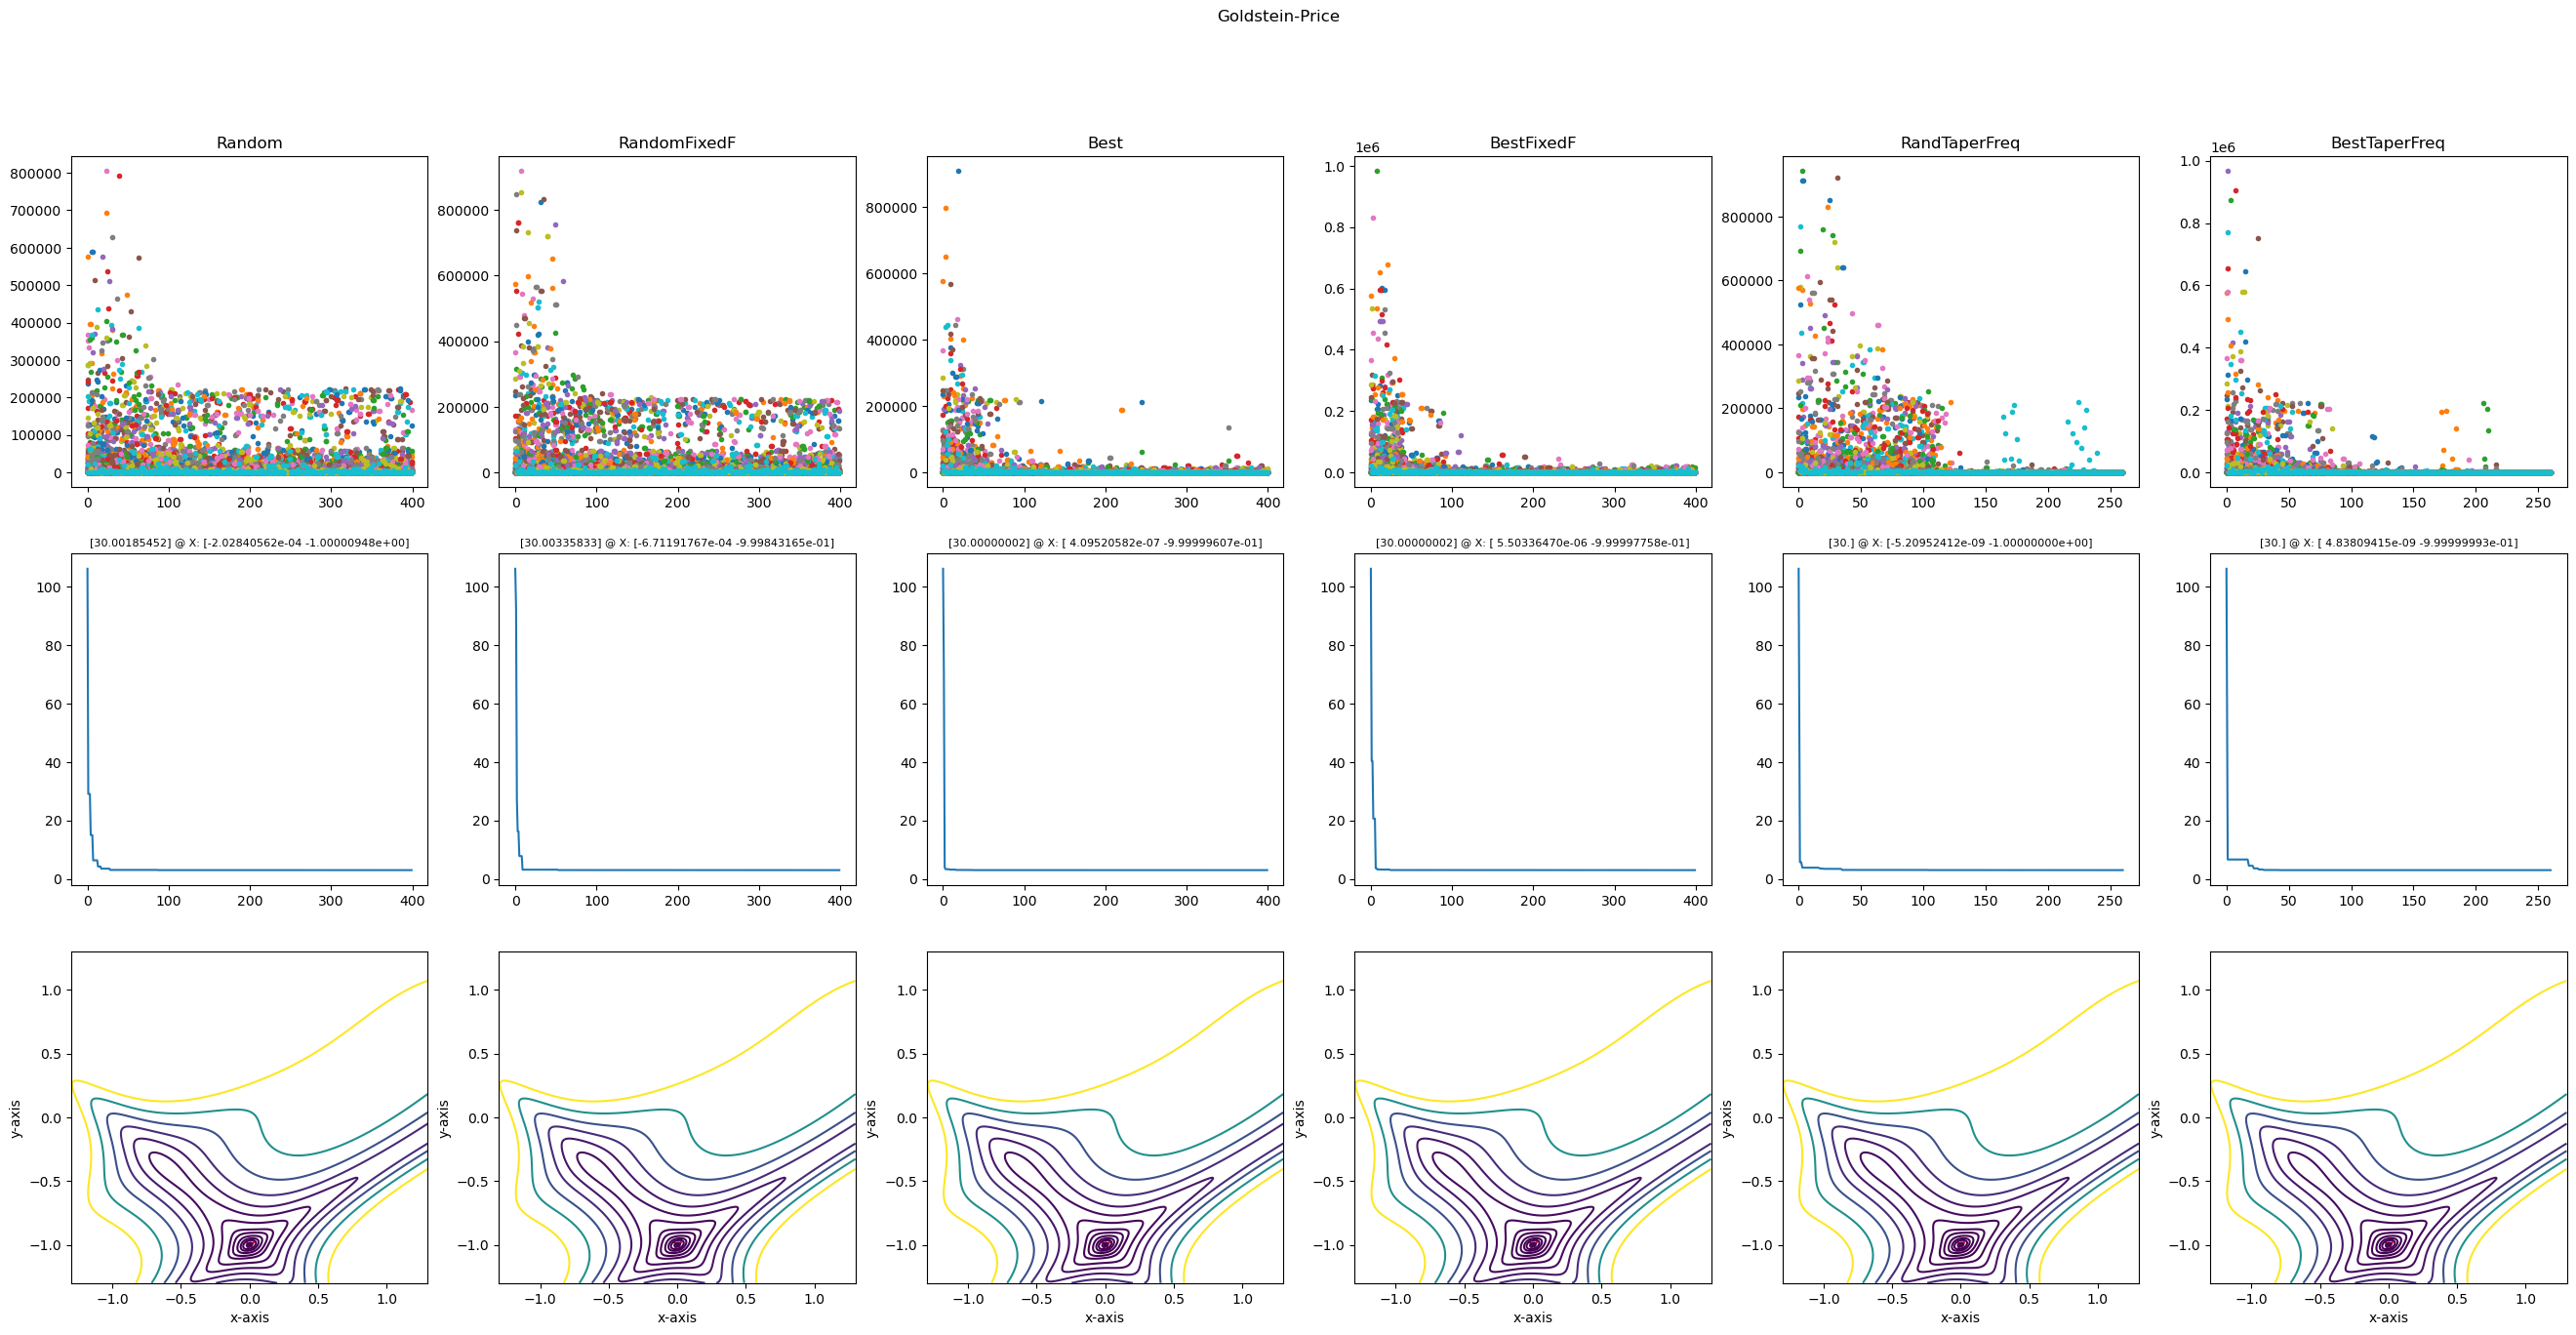

In [10]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Goldstein-Price", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [11]:
ani_summary.save('goldstein_price_summary.gif', writer='ffmpeg', fps=15)
Image(url='goldstein_price_summary.gif')

2025-10-22 19:03:21,223 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:03:21,223 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y goldstein_price_summary.gif


In [12]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Goldstein-Price", mark=global_opt)
    animation3d.save('goldstein_price_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

2025-10-22 19:07:36,666 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:07:36,667 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y goldstein_price_Random_3d.gif
2025-10-22 19:08:16,506 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:08:16,507 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y goldstein_price_RandomFixedF_3d.gif
2025-10-22 19:08:56,629 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:08:56,630 - matplotlib.animat

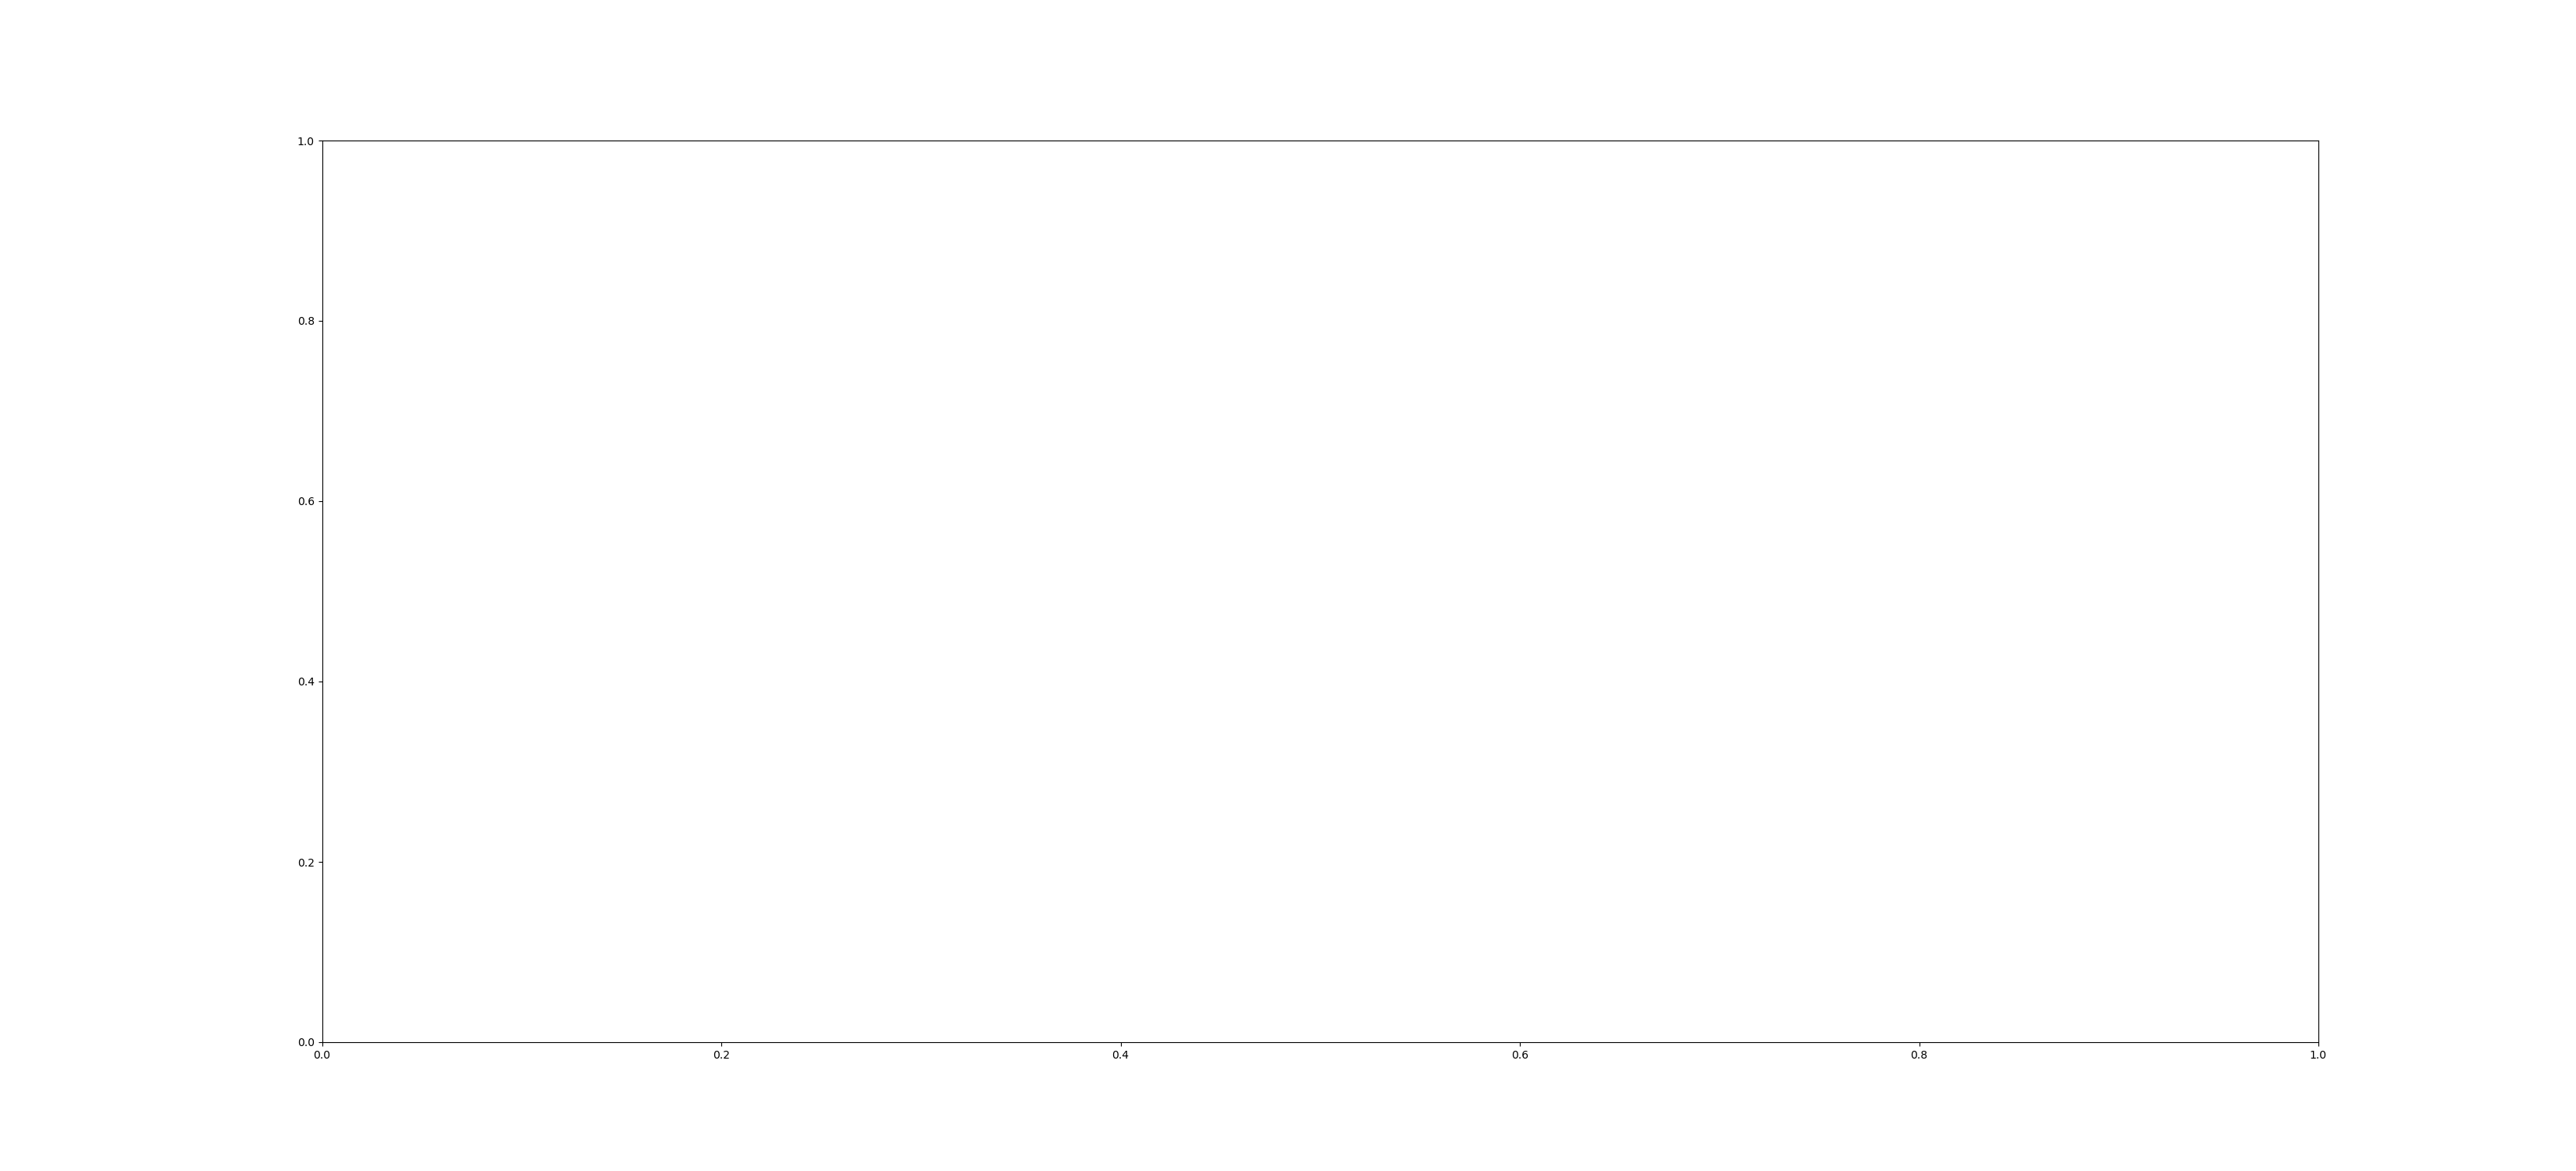

In [13]:
Image('goldstein_price_Random_3d.gif')

In [14]:
%%capture
d.limits = [(-1,1), (-1,1), (-0.1, 1.0)]
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Goldstein-Price", mark=global_opt)
    animation3d.save('goldstein_price_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)
Image('goldstein_price_zoom_Random_3d.gif')

2025-10-22 19:11:08,251 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:11:08,252 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y goldstein_price_Random_3d.gif
2025-10-22 19:11:48,244 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:11:48,245 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y goldstein_price_RandomFixedF_3d.gif
2025-10-22 19:12:30,122 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:12:30,123 - matplotlib.animat

FileNotFoundError: No such file or directory: 'goldstein_price_zoom_Random_3d.gif'

FileNotFoundError: No such file or directory: 'goldstein_price_zoom_Random_3d.gif'

Rosenbrock's  objective function

    Also known as the Rosenbrock's valley or Rosenbrock's banana
    function. Has a global minimum of :code:`np.ones(dimensions)` where
    :code:`dimensions` is :code:`x.shape[1]`. The search domain is
    :code:`[-inf, inf]`.


In [18]:
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.ps_rosenbrock, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (-1,100)], label=['x-axis', 'y-axis', 'z-axis'])

In [19]:
n_dim = 2
lb = [-100., -100.]
ub = [100., 100.]
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

global_opt = (1, 1, 0)

for config in configs:
    config["initial_guesses"] = common_start
    config["lb"] = lb
    config["ub"] = ub
    config["n_dim"] = n_dim
    config["vectorize_func"] = True

i: best_x is  [0.96376196 0.93273198] best_y is [0.00283019]
i: best_x is  [0.98611312 0.97186273] best_y is [0.0002238]
i: best_x is  [0.9998686  0.99972351] best_y is [3.60269822e-08]
i: best_x is  [1.00005974 1.00010894] best_y is [1.46802583e-08]
i: best_x is  [1.00000711 1.00001626] best_y is [4.67215246e-10]
i: best_x is  [1.00000348 1.00000678] best_y is [1.48860405e-11]


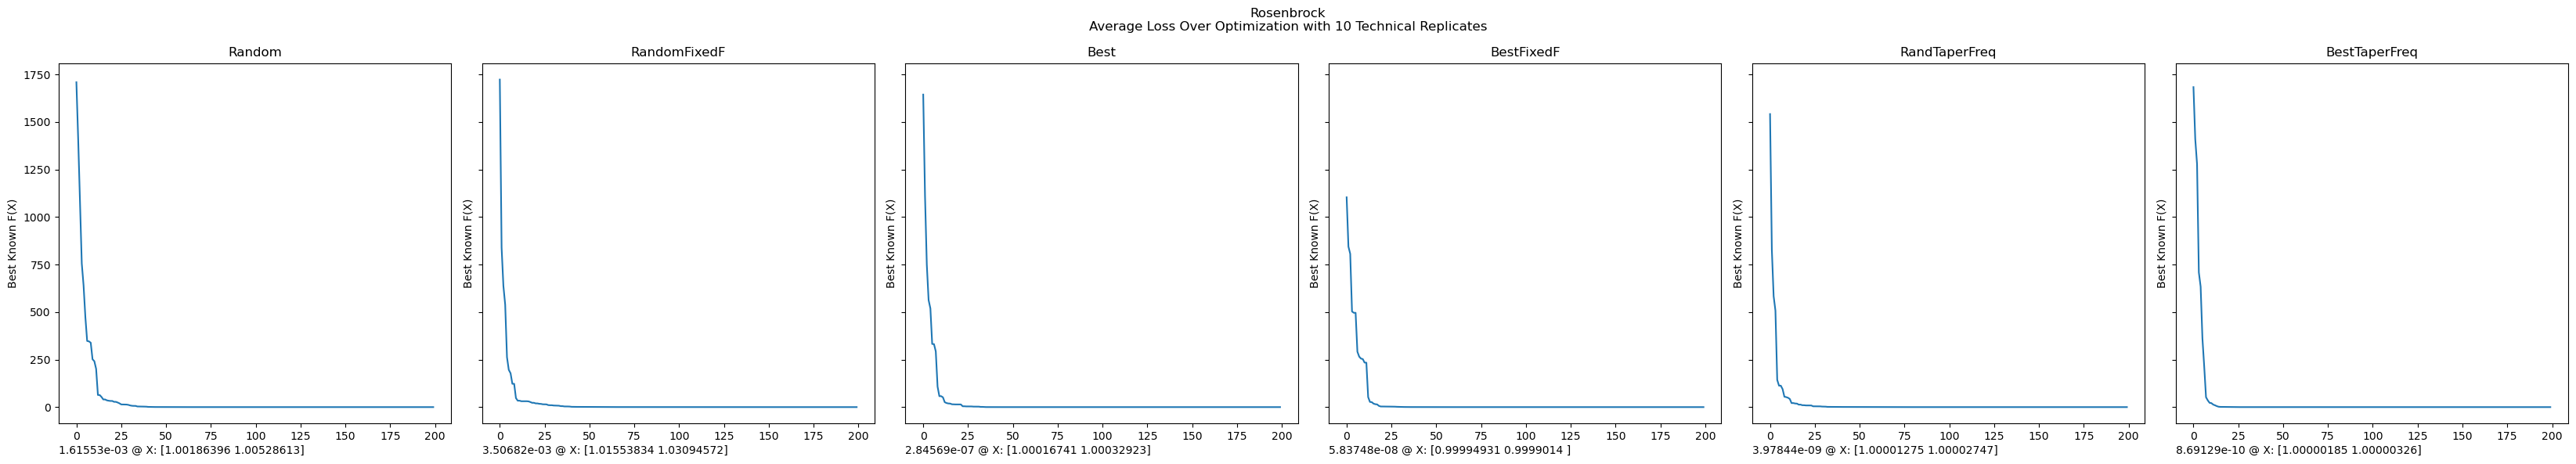

In [20]:
opts, full_opts = run_plot_opts(example_funcs.rosenbrock, n_dim, configs, technical_replicates, 'Rosenbrock\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')

400
400
400
400
261
261


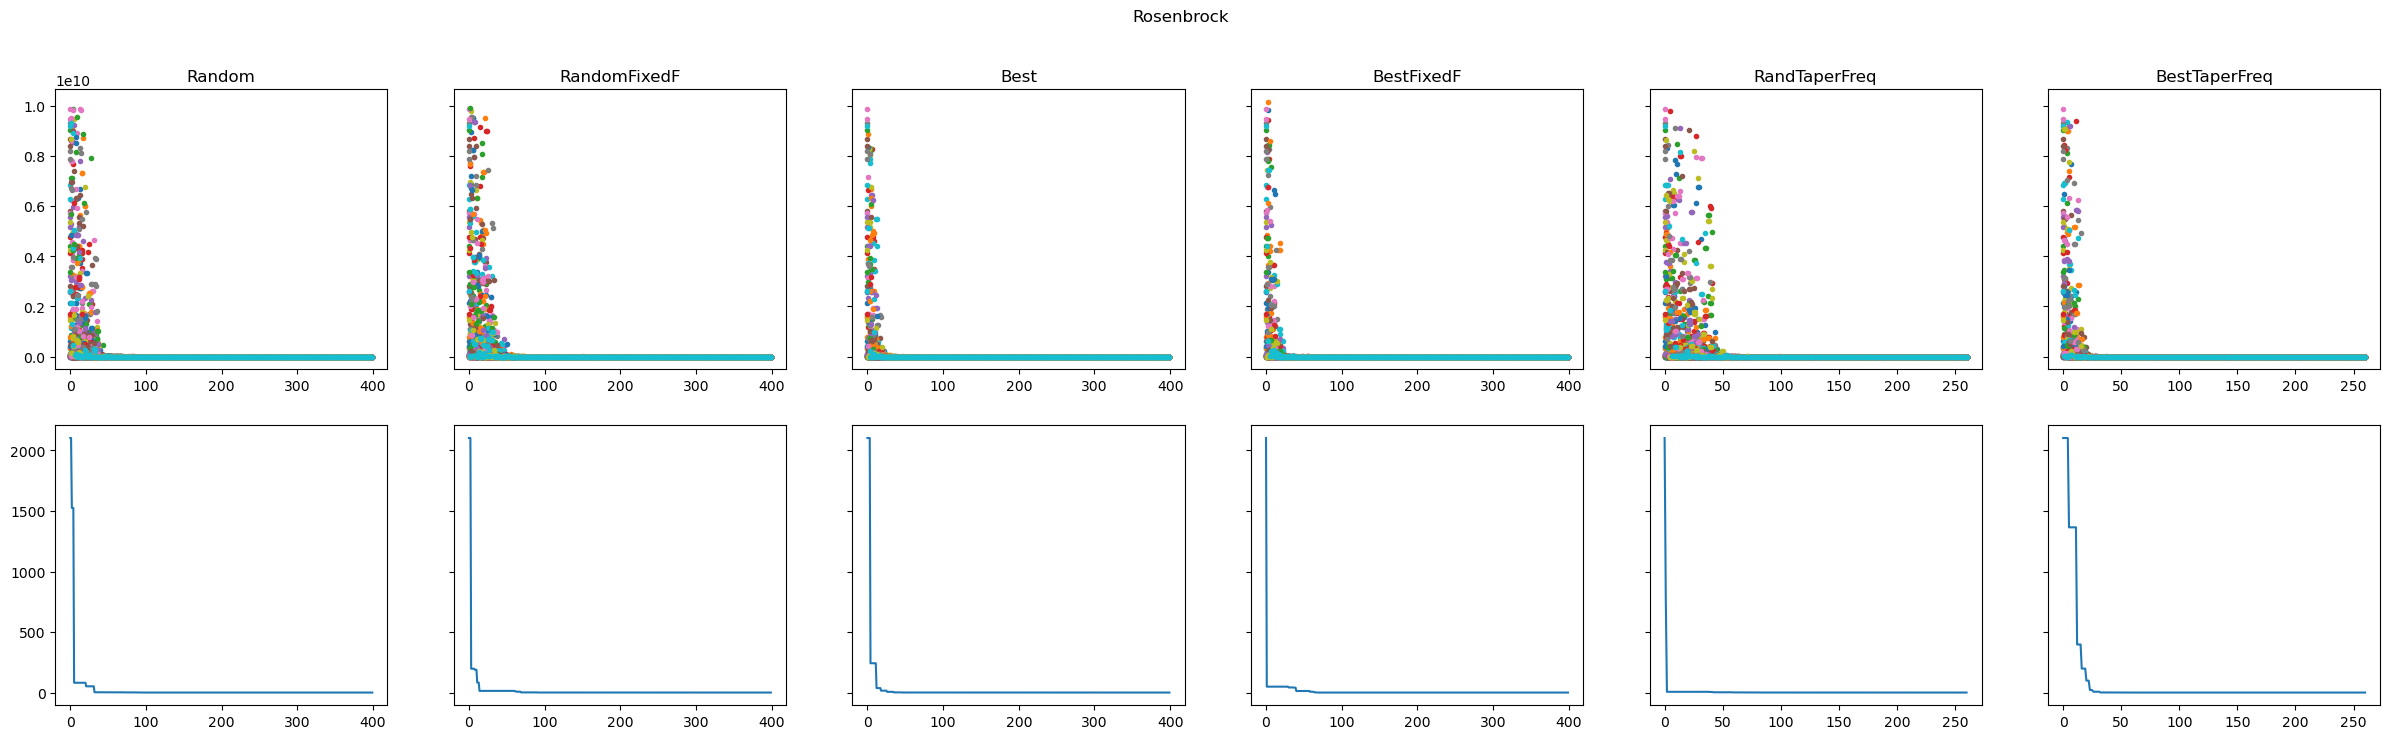

In [21]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8), sharey='row')
fig.suptitle('Rosenbrock')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [22]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('rosenbrock_'+str(i)+'.gif', writer='ffmpeg', fps=20)

2025-10-22 19:23:45,809 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:23:45,810 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -framerate 20 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y rosenbrock_Random.gif
2025-10-22 19:25:10,032 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:25:10,033 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -framerate 20 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y rosenbrock_RandomFixedF.gif
2025-10-22 19:26:31,266 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:26:31,267 - matplotlib.animation - INFO - Movie

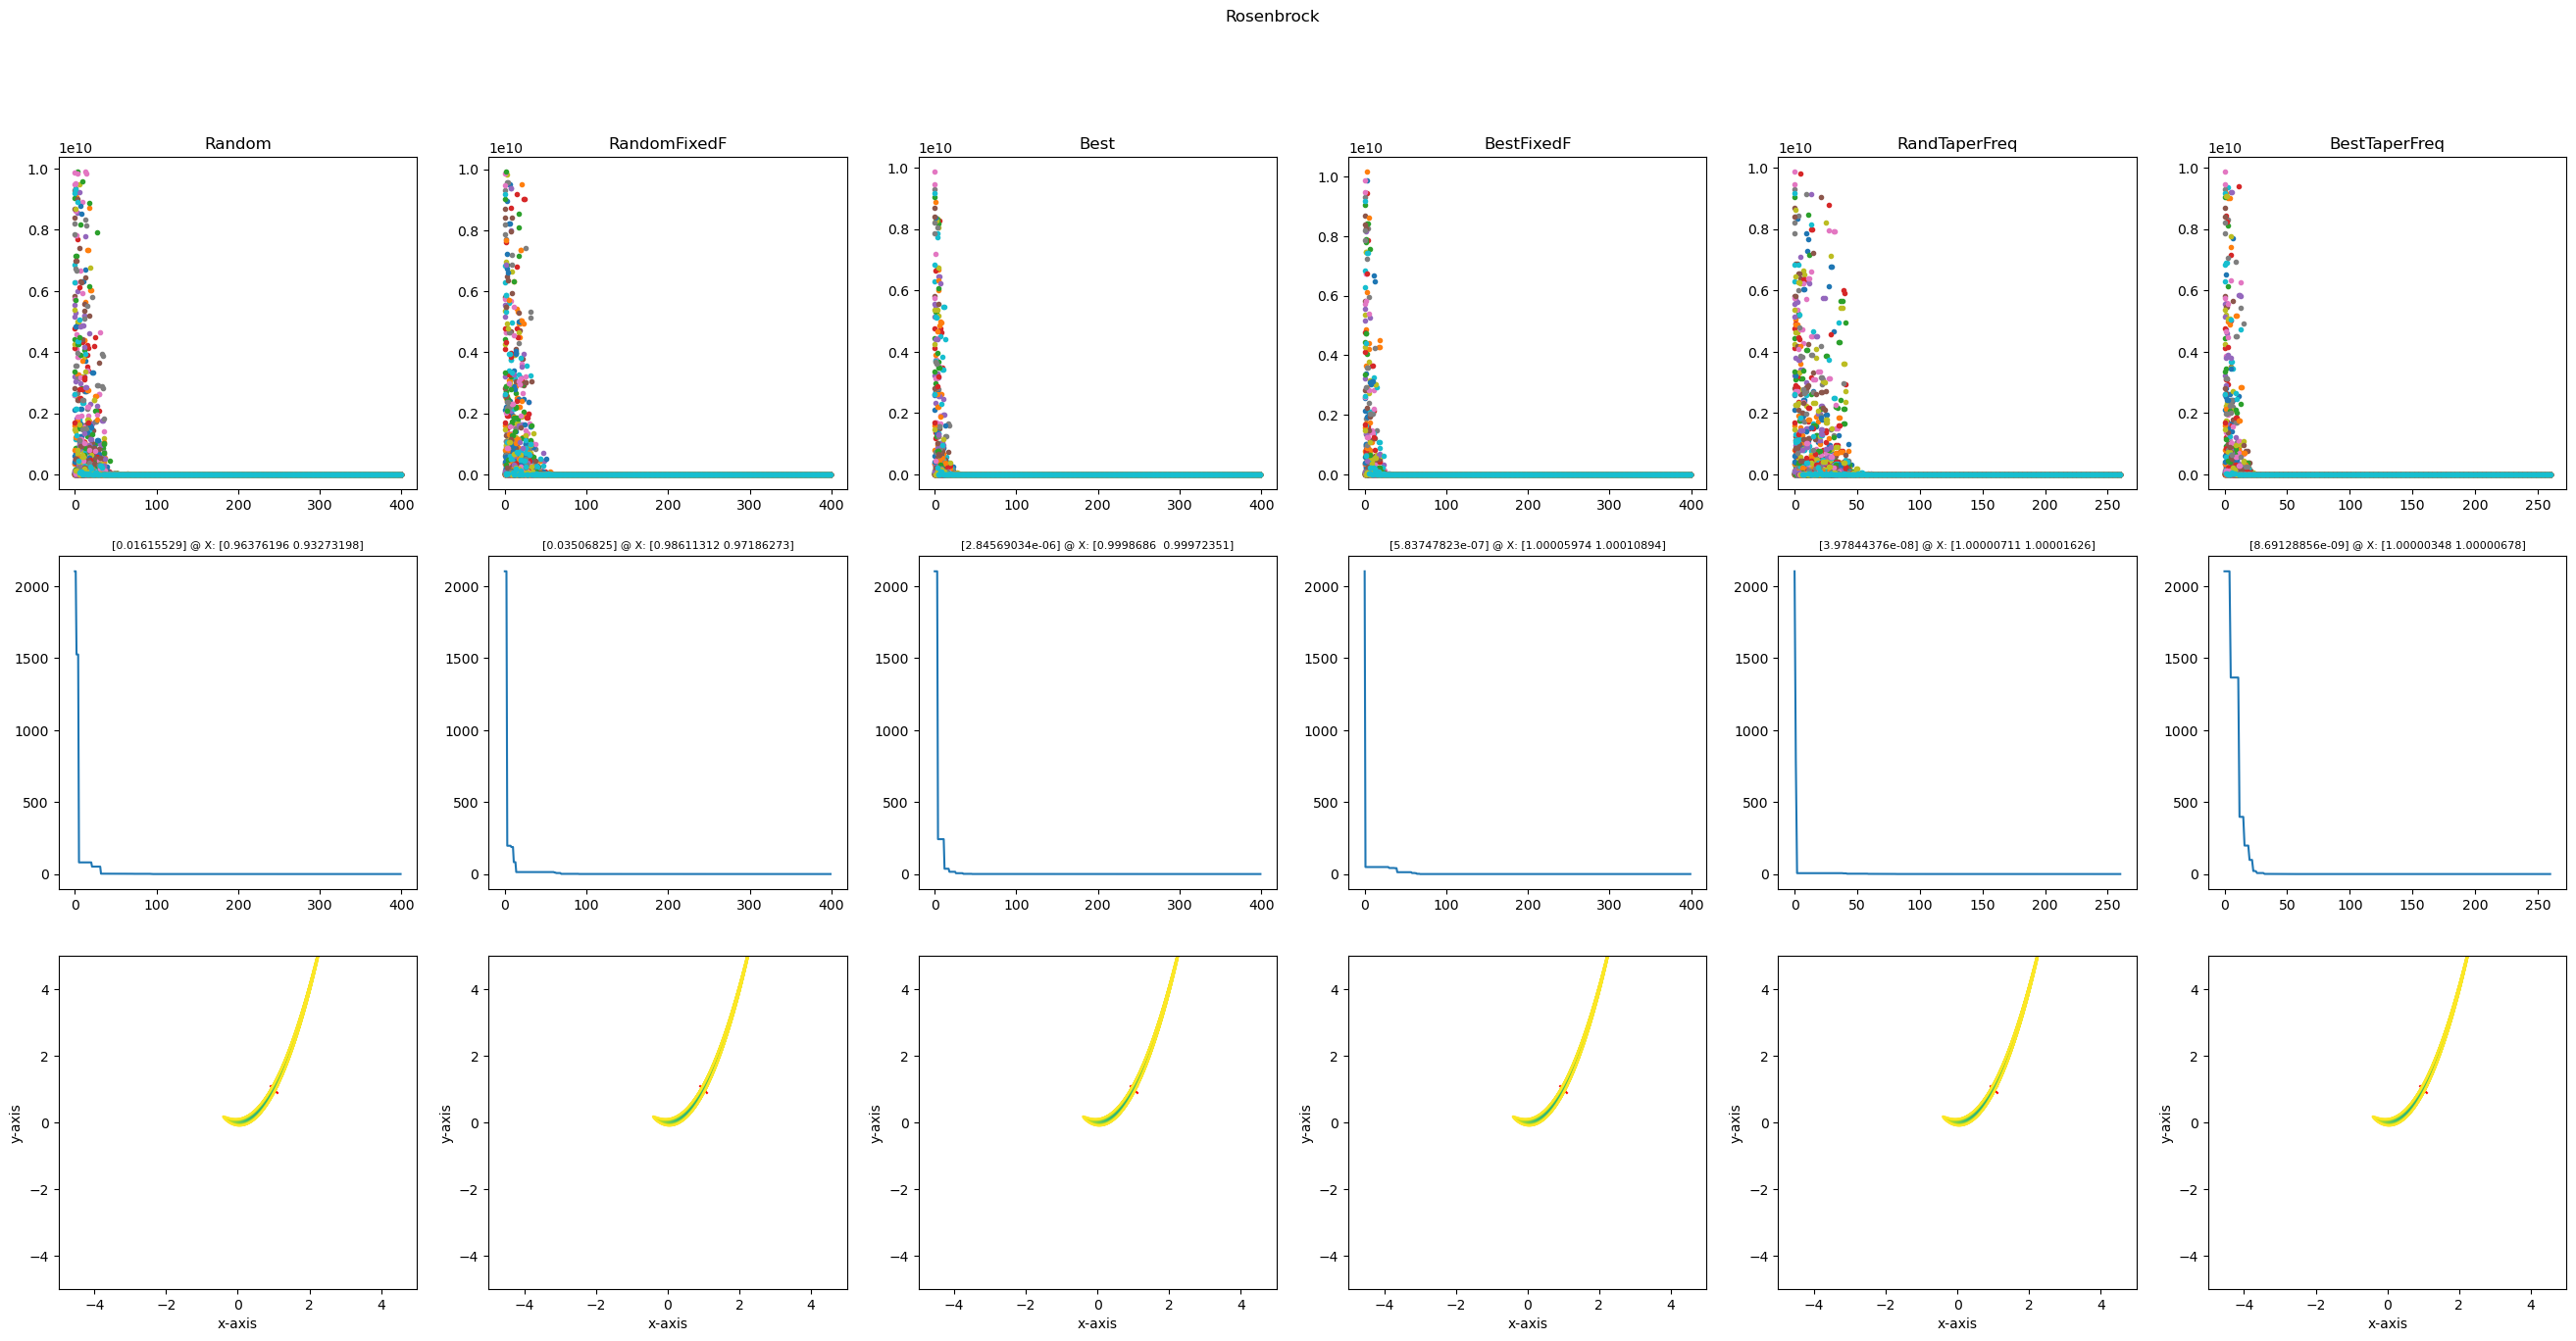

In [23]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Rosenbrock", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [24]:
ani_summary.save('rosenbrock_summary.gif', writer='ffmpeg', fps=15)
Image(url='rosenbrock_summary.gif')

2025-10-22 19:34:14,889 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:34:14,890 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y rosenbrock_summary.gif


In [25]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Rosenbrock", mark=global_opt)
    animation3d.save('rosenbrock_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

2025-10-22 19:41:16,530 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:41:16,531 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y rosenbrock_Random_3d.gif
2025-10-22 19:41:59,687 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:41:59,688 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 3300x1500 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y rosenbrock_RandomFixedF_3d.gif
2025-10-22 19:42:42,775 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-10-22 19:42:42,776 - matplotlib.animation - INFO

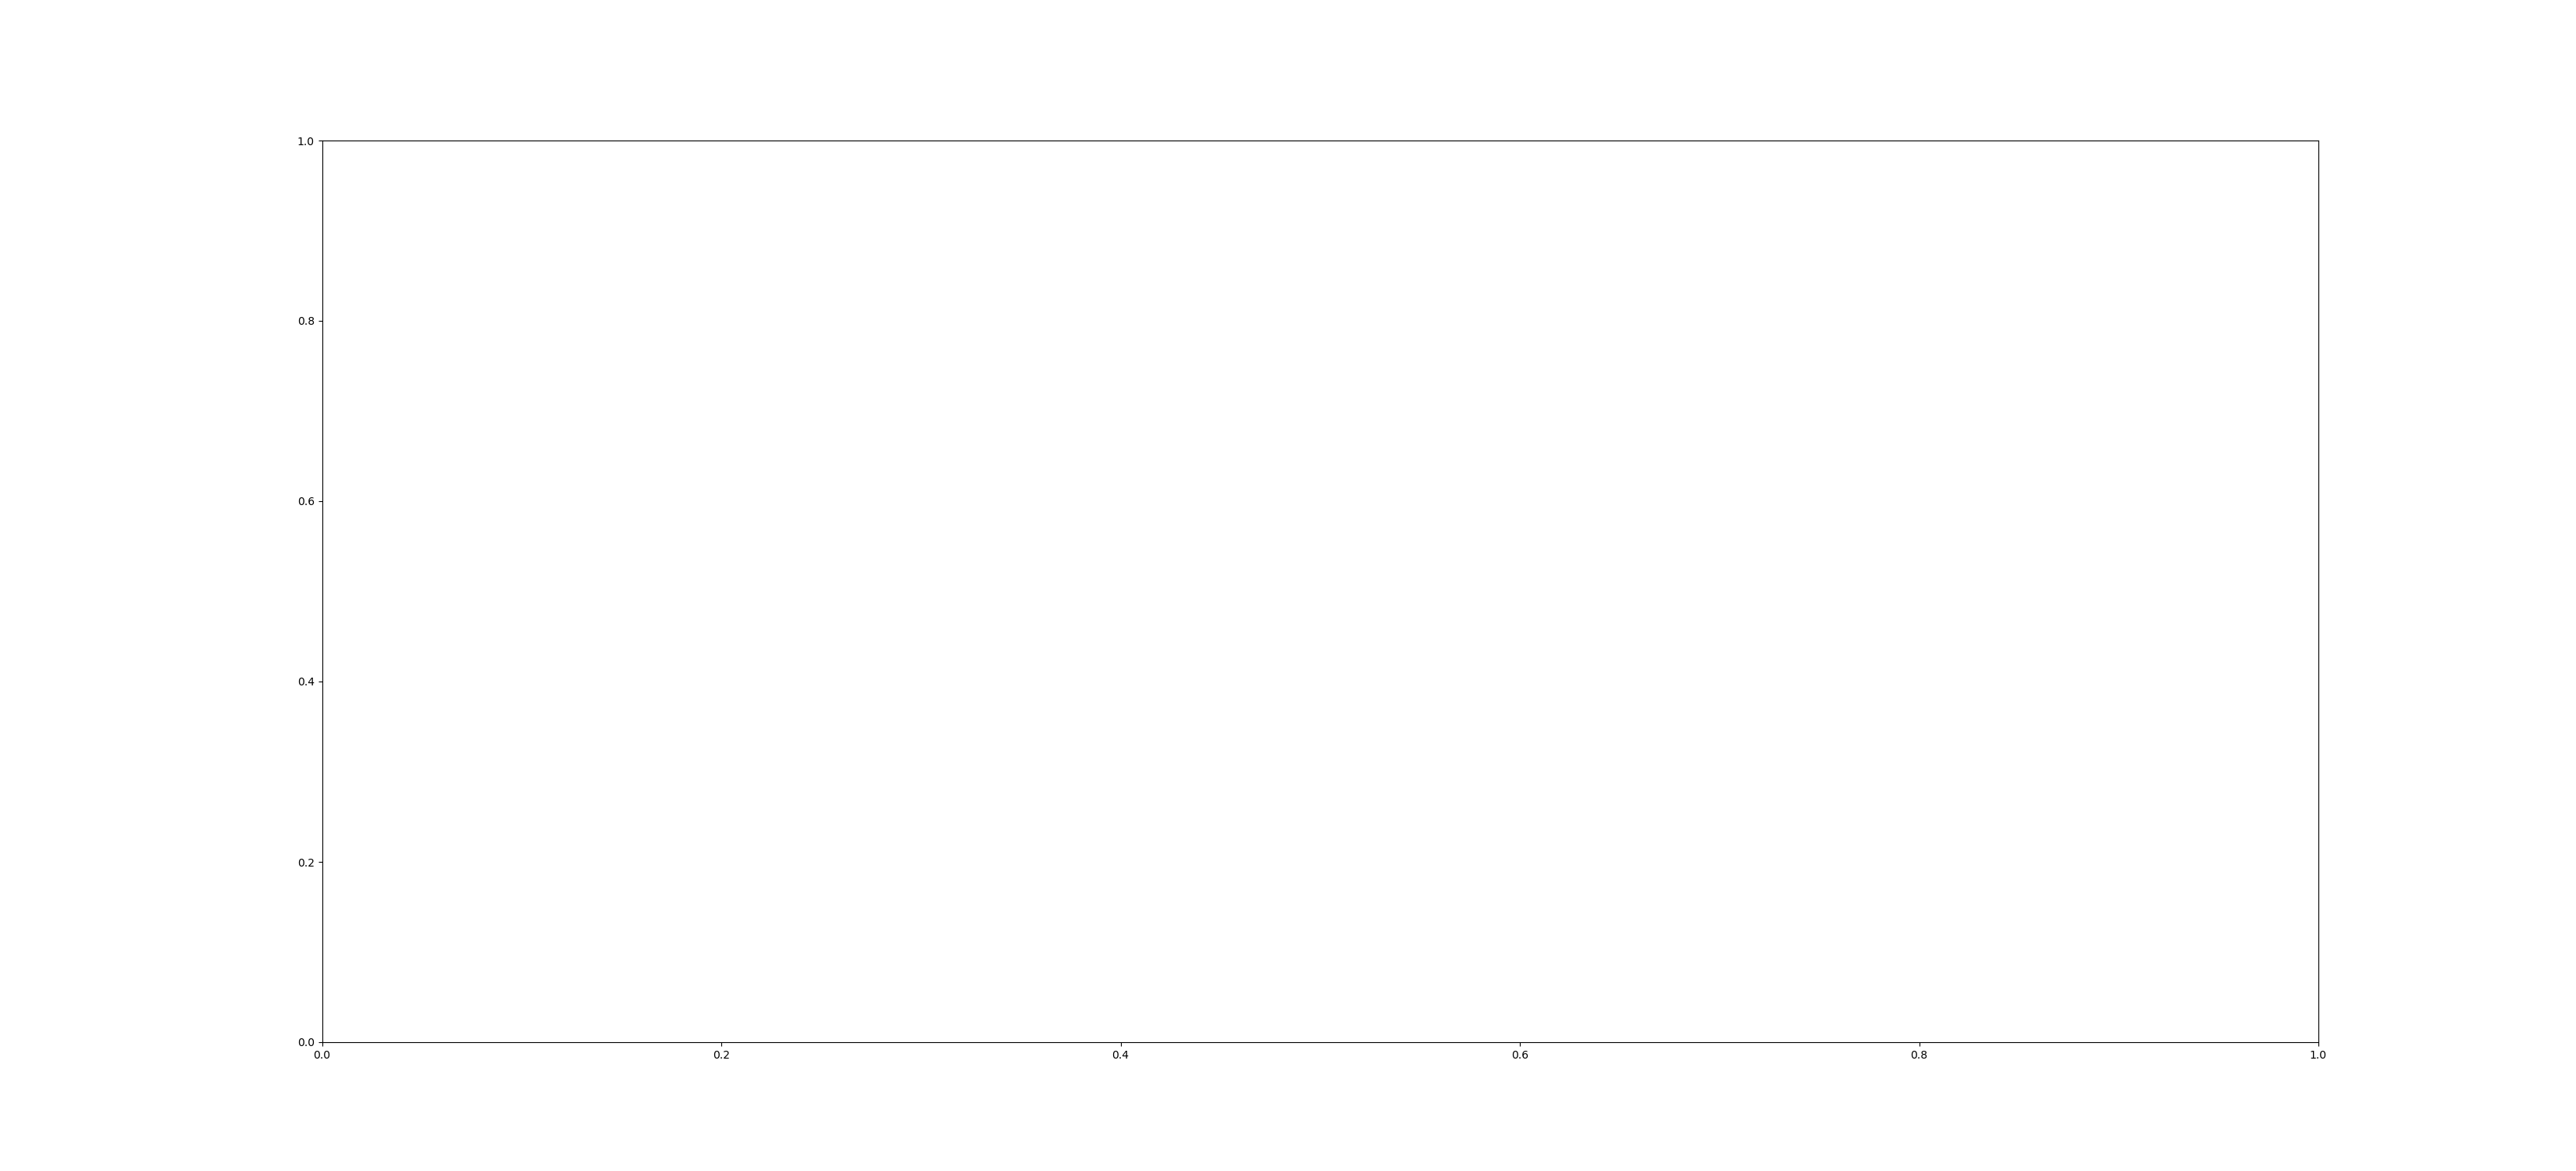

In [26]:
Image('rosenbrock_Random_3d.gif')

Beale's  objective function

    Only takes two dimensions and has a global minimum of 0 at f([3,0.5]) Its domain is bounded between [-4.5, 4.5]

In [ ]:
n_dim = 2
lb = [-4.5, -4.5]
ub = [4.5, 4.5]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

global_opt = (3, 0.5, 0)

for config in configs:
    config["initial_guesses"] = common_start
    config["lb"] = lb
    config["ub"] = ub
    config["n_dim"] = n_dim
    config["vectorize_func"] = False

In [ ]:
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.beale, limits=[(-4.5,4.5), (-4.5,4.5)])
#Adjust figure limits
d = Designer(limits=[(-4.5,4.5), (-4.5,4.5), (-0.5,100)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
opts, full_opts = run_plot_opts(example_funcs.goldstein, n_dim, configs, technical_replicates, 'Beale\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')

In [ ]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8), sharey='row')
fig.suptitle('Beale')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [ ]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('beale_'+str(i)+'.gif', writer='ffmpeg', fps=20)

In [ ]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Beale", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [ ]:
ani_summary.save('beale_summary.gif', writer='ffmpeg', fps=15)
Image(url='beale_summary.gif')

In [ ]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Beale", mark=global_opt)
    animation3d.save('beale_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

In [ ]:
Image('beale_Random_3d.gif')

Booth's  objective function

    Only takes two dimensions and has a global minimum of `0` at
    :code:`f([1,3])`. Its domain is bounded between :code:`[-10, 10]`

In [ ]:
n_dim = 2
lb = [-10, -10]
ub = [10, 10]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

global_opt = (1, 3, 0)

for config in configs:
    config["initial_guesses"] = common_start
    config["lb"] = lb
    config["ub"] = ub
    config["n_dim"] = n_dim
    config["vectorize_func"] = False

In [ ]:
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.booth, limits=[(-10, 10), (-10, 10)])
#Adjust figure limits
d = Designer(limits=[(-10, 10), (-10, 10), (0,10)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
opts, full_opts = run_plot_opts(example_funcs.goldstein, n_dim, configs, technical_replicates, 'Booth\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')

In [ ]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8), sharey='row')
fig.suptitle('Booth')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [ ]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('booth_'+str(i)+'.gif', writer='ffmpeg', fps=20)

In [ ]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Booth", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [ ]:
ani_summary.save('booth_summary.gif', writer='ffmpeg', fps=15)
Image(url='booth_summary.gif')

In [ ]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Booth", mark=global_opt)
    animation3d.save('booth_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

In [ ]:
Image('booth_Random_3d.gif')

Bukin N. 6 Objective Function

    Only takes two dimensions and has a global minimum  of `0` at
    :code:`f([-10,1])`. Its coordinates are bounded by:
        * x[:,0] must be within [-15, -5]
        * x[:,1] must be within [-3, 3]

In [ ]:
import copy
n_dim = 2
lb=[-15., -3.]
ub = [-5., 3.]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

global_opt = (-10, 1, 0)

for config in configs:
    config["initial_guesses"] = common_start
    config["lb"] = lb
    config["ub"] = ub
    config["n_dim"] = n_dim
    config["vectorize_func"] = False

In [ ]:
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.bukin6, limits=[(-15,-5), (-3,3)])
#Adjust figure limits
d = Designer(limits=[(-15,-5), (-3,3), (0,100)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
opts, full_opts = run_plot_opts(example_funcs.goldstein, n_dim, configs, technical_replicates, 'Bukin N.6\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')

In [ ]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8), sharey='row')
fig.suptitle('Bukin')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [ ]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('bukin_'+str(i)+'.gif', writer='ffmpeg', fps=20)

In [ ]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Bukin", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [ ]:
ani_summary.save('bukin_summary.gif', writer='ffmpeg', fps=15)
Image(url='bukin_summary.gif')

In [ ]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Bukin", mark=global_opt)
    animation3d.save('bukin_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

In [ ]:
Image('bukin_Random_3d.gif')

Rastrigin's  objective function

    Has a global minimum at :code:`f(0,0,...,0)` with a search
    domain of :code:`[-5.12, 5.12]`

In [ ]:
import copy
n_dim = 2
lb=[-5.12, -5.12]
ub = [5.12, 5.12]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

global_opt = (0, 0, 0)

for config in configs:
    config["initial_guesses"] = common_start
    config["lb"] = lb
    config["ub"] = ub
    config["n_dim"] = n_dim
    config["vectorize_func"] = False

In [ ]:
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.rastrigin, limits=[(-5.12,5.12), (-5.12,5.12)])
#Adjust figure limits
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (0,10)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
opts, full_opts = run_plot_opts(example_funcs.goldstein, n_dim, configs, technical_replicates, 'Rastrigin\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')

In [ ]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8), sharey='row')
fig.suptitle('Rastrigin')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [ ]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('rastrigin_'+str(i)+'.gif', writer='ffmpeg', fps=20)

In [ ]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Rastrigin", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [ ]:
ani_summary.save('rastrigin_summary.gif', writer='ffmpeg', fps=15)
Image(url='rastrigin_summary.gif')

In [ ]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Rastrigin", mark=global_opt)
    animation3d.save('rastrigin_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

In [ ]:
Image('rastrigin_Random_3d.gif')